# Clustering e PCA

funções:
* *dendrogram* (package scipy)
* *KMeans* (package scikit-learn)

Para maior detalhe sobre os métodos disponibilizados no scikit-learn:
http://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods


Alterar parâmetros do método e da métrica e comparar resultados:
- single-> Nearest Point Algorithm;
- compelete -> Farthest Point Algorithm;
-  centroid -> when two clusters s and t are combined into a new cluster, the new centroid is computed over all the original objects in clusters s and t.
- correlation -> computes the correlation distance between vectors u and v.


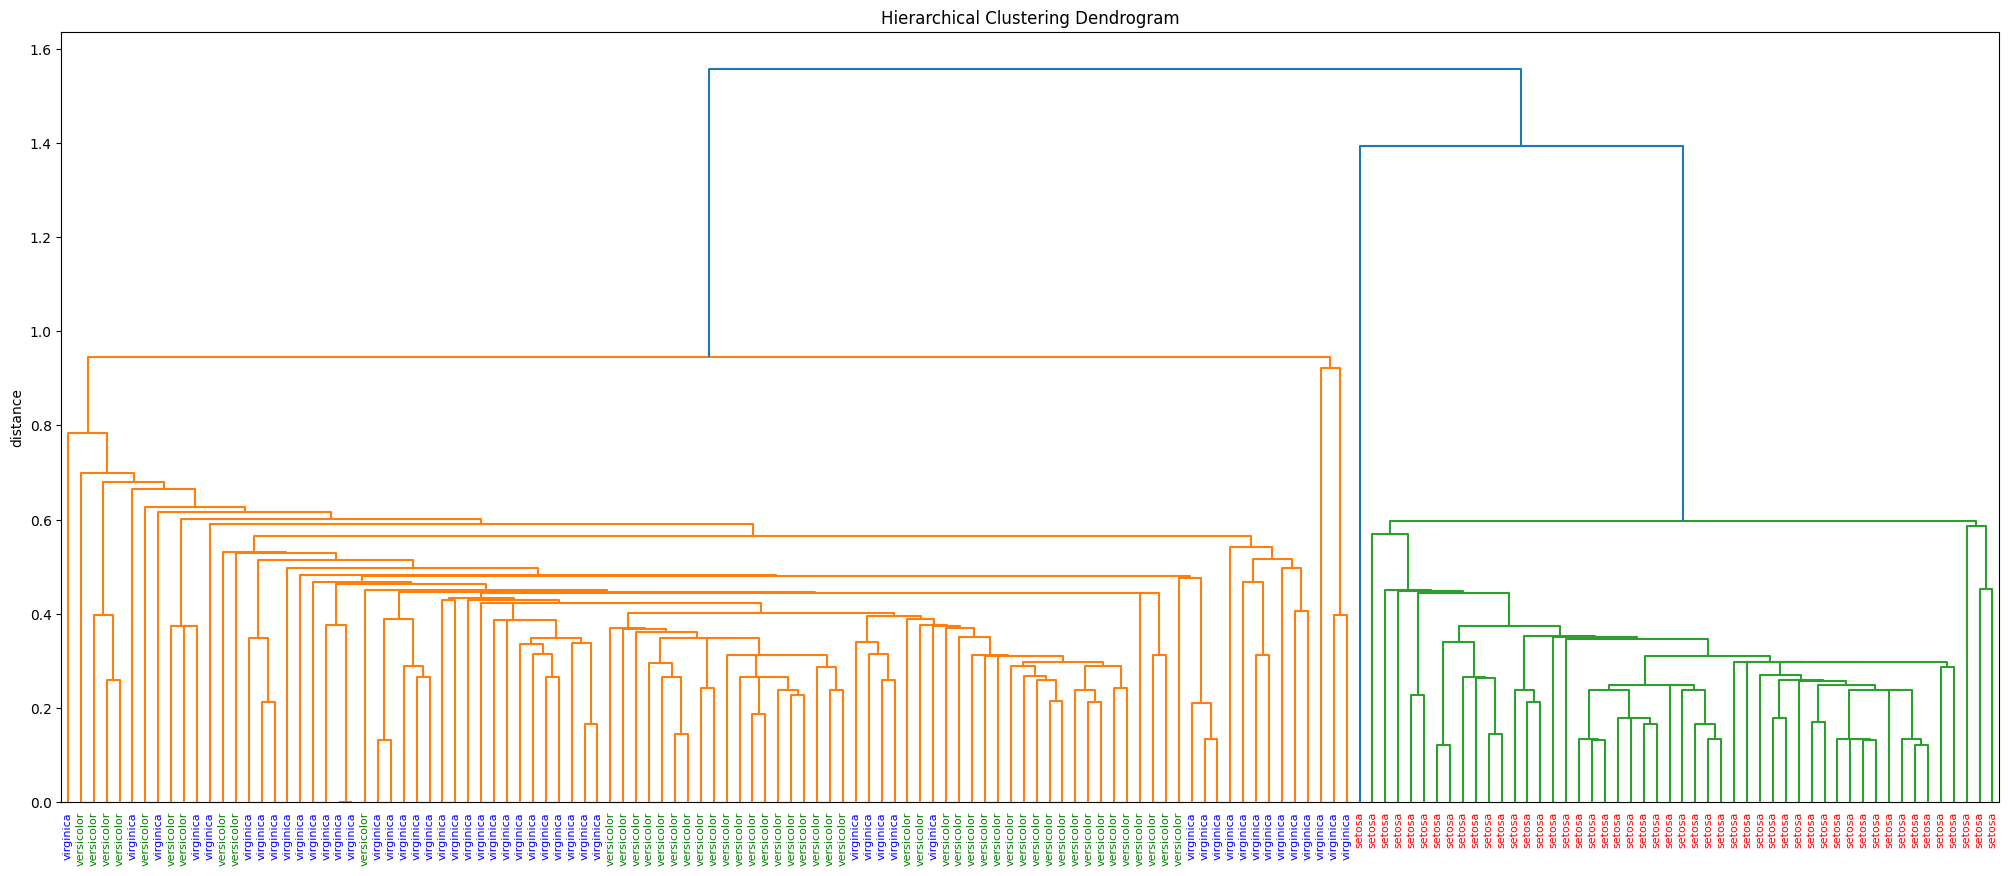

In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage

iris = pd.read_csv("iris.csv", sep=",", index_col=0)
iris_scale = preprocessing.scale(iris.iloc[:,:4])

Z = linkage(iris_scale, method='single', metric='euclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(iris.iloc[:,4]),
    leaf_rotation=90.,  # rotates the x-axis labels
    leaf_font_size=8.,  # font size for the x-axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')


# Assignment of colors to labels: 'a' is red, 'b' is green, etc.
label_colors = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}
ax = plt.gca()
x_labels = ax.get_xmajorticklabels()
for lbl in x_labels:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

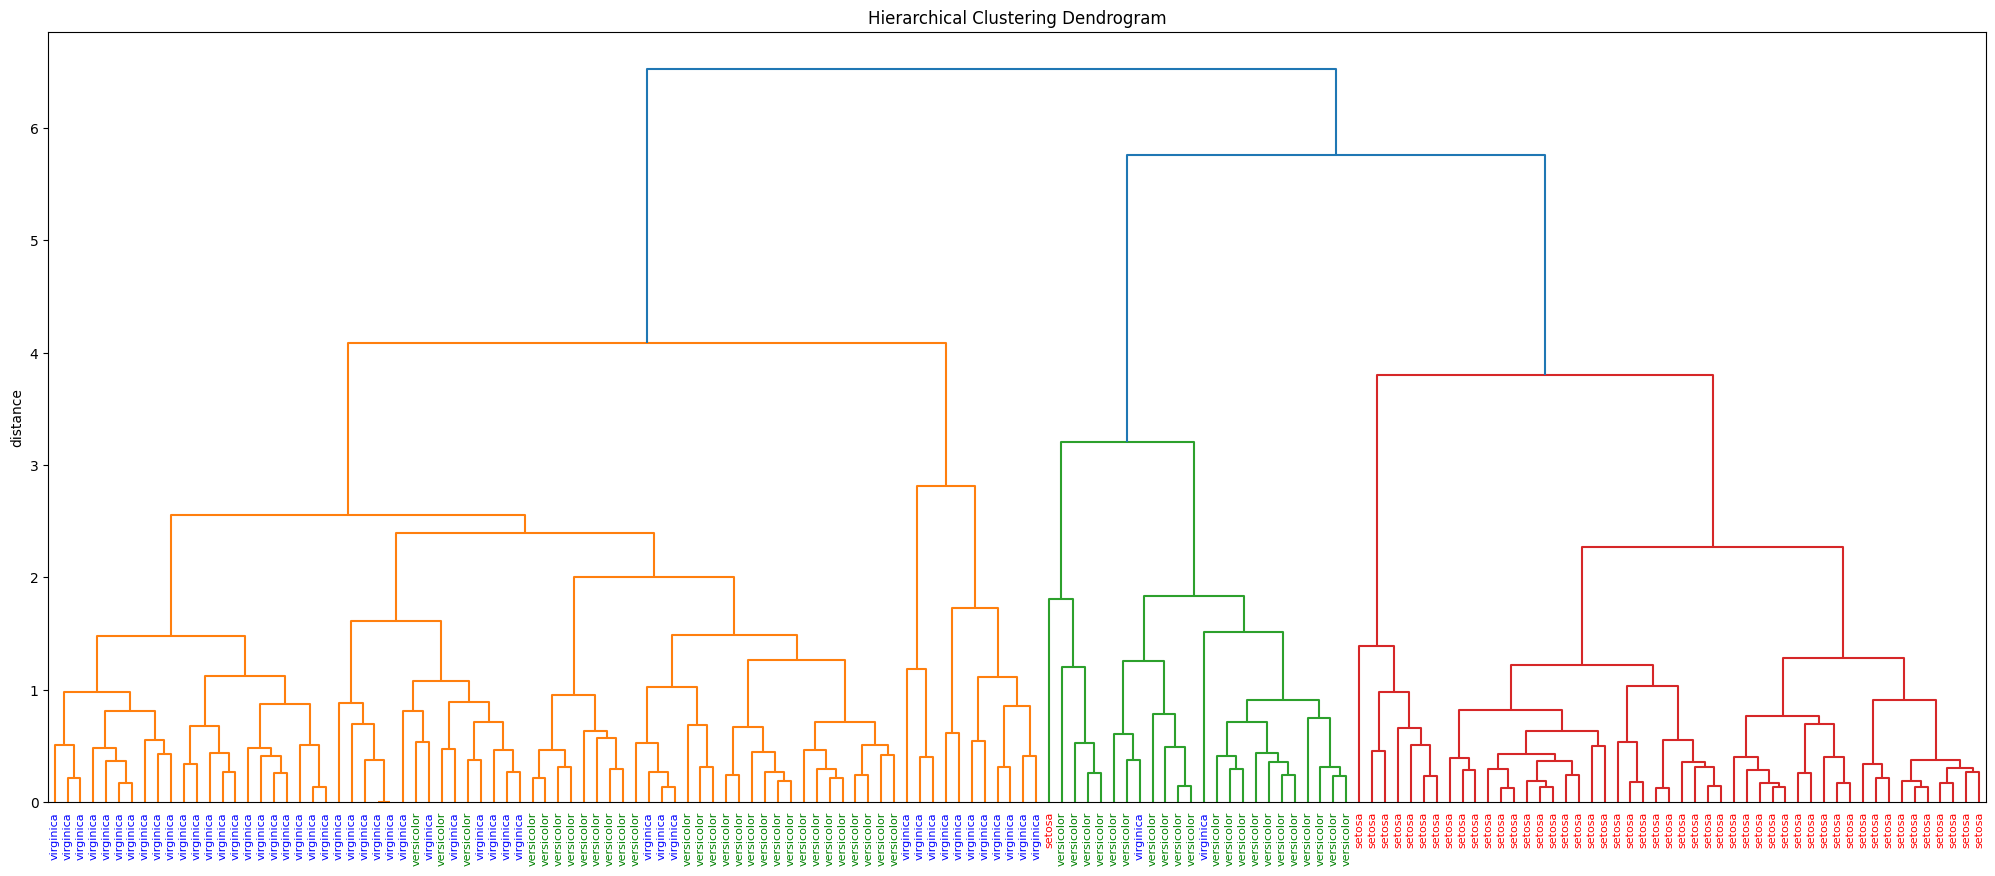

In [4]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage

iris = pd.read_csv("iris.csv", sep=",", index_col=0)
iris_scale = preprocessing.scale(iris.iloc[:,:4])

Z = linkage(iris_scale, method='complete', metric='euclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(iris.iloc[:,4]),
    leaf_rotation=90.,  # rotates the x-axis labels
    leaf_font_size=8.,  # font size for the x-axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')


# Assignment of colors to labels: 'a' is red, 'b' is green, etc.
label_colors = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}
ax = plt.gca()
x_labels = ax.get_xmajorticklabels()
for lbl in x_labels:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

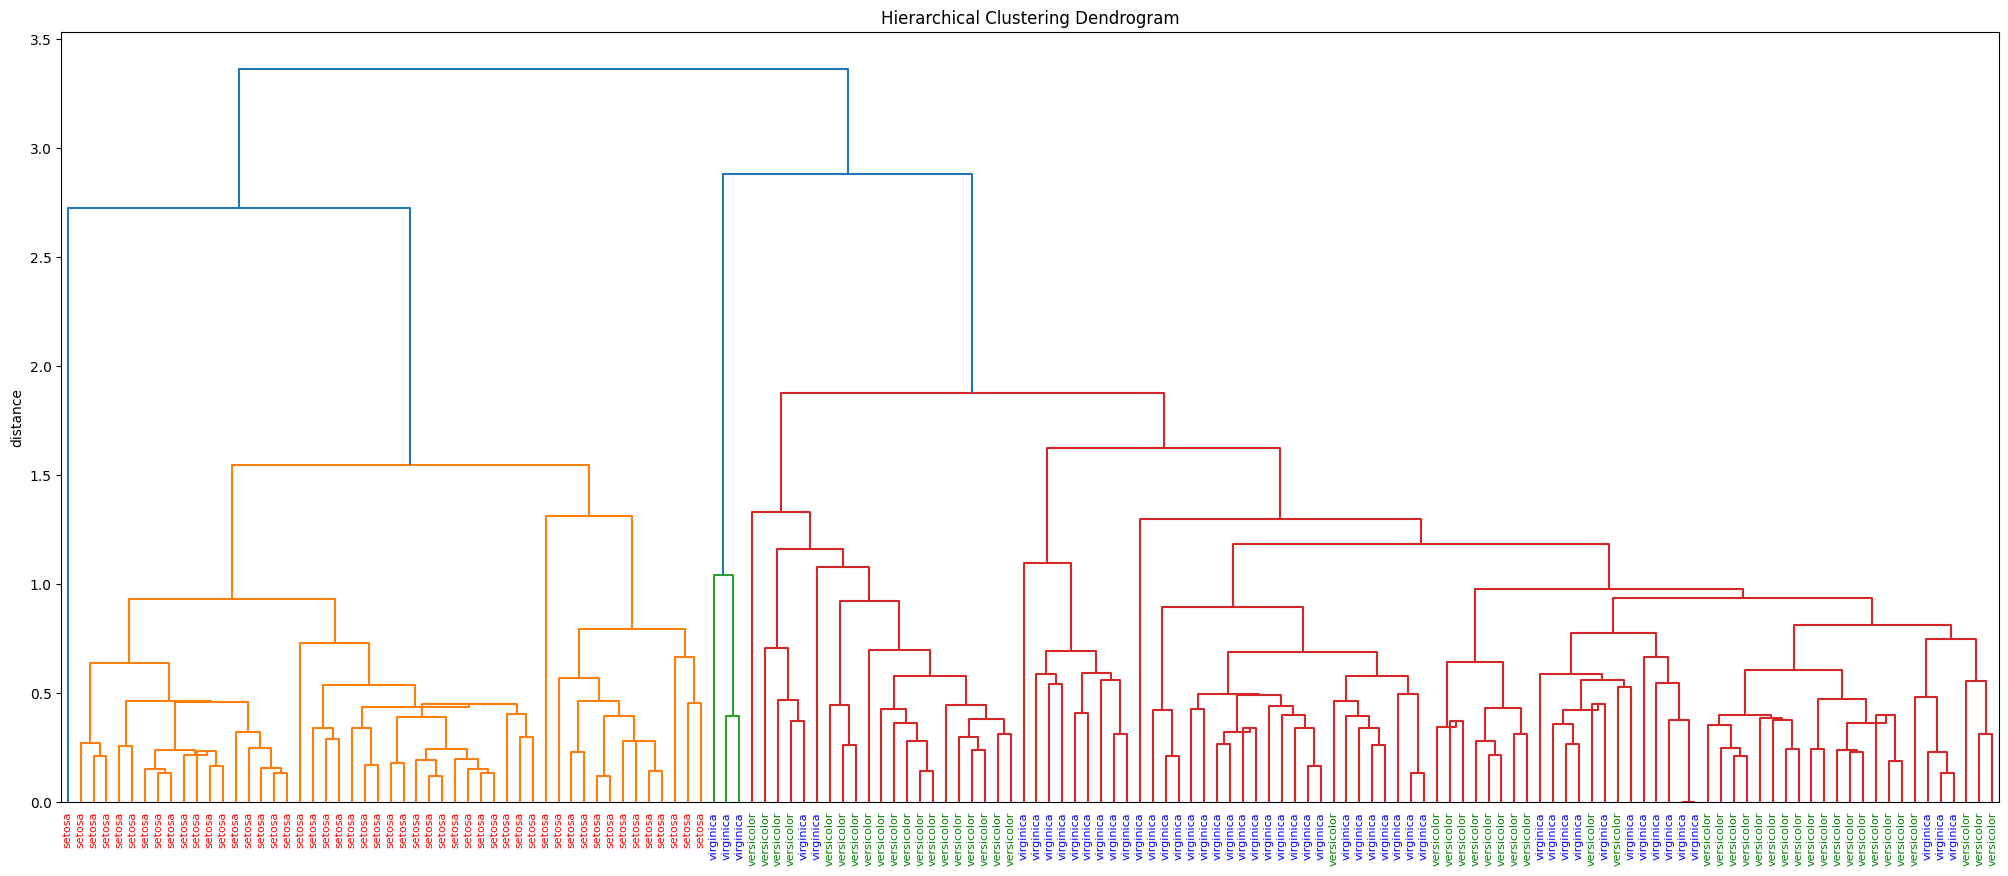

In [5]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage

iris = pd.read_csv("iris.csv", sep=",", index_col=0)
iris_scale = preprocessing.scale(iris.iloc[:,:4])

Z = linkage(iris_scale, method='centroid', metric='euclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(iris.iloc[:,4]),
    leaf_rotation=90.,  # rotates the x-axis labels
    leaf_font_size=8.,  # font size for the x-axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')


# Assignment of colors to labels: 'a' is red, 'b' is green, etc.
label_colors = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}
ax = plt.gca()
x_labels = ax.get_xmajorticklabels()
for lbl in x_labels:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

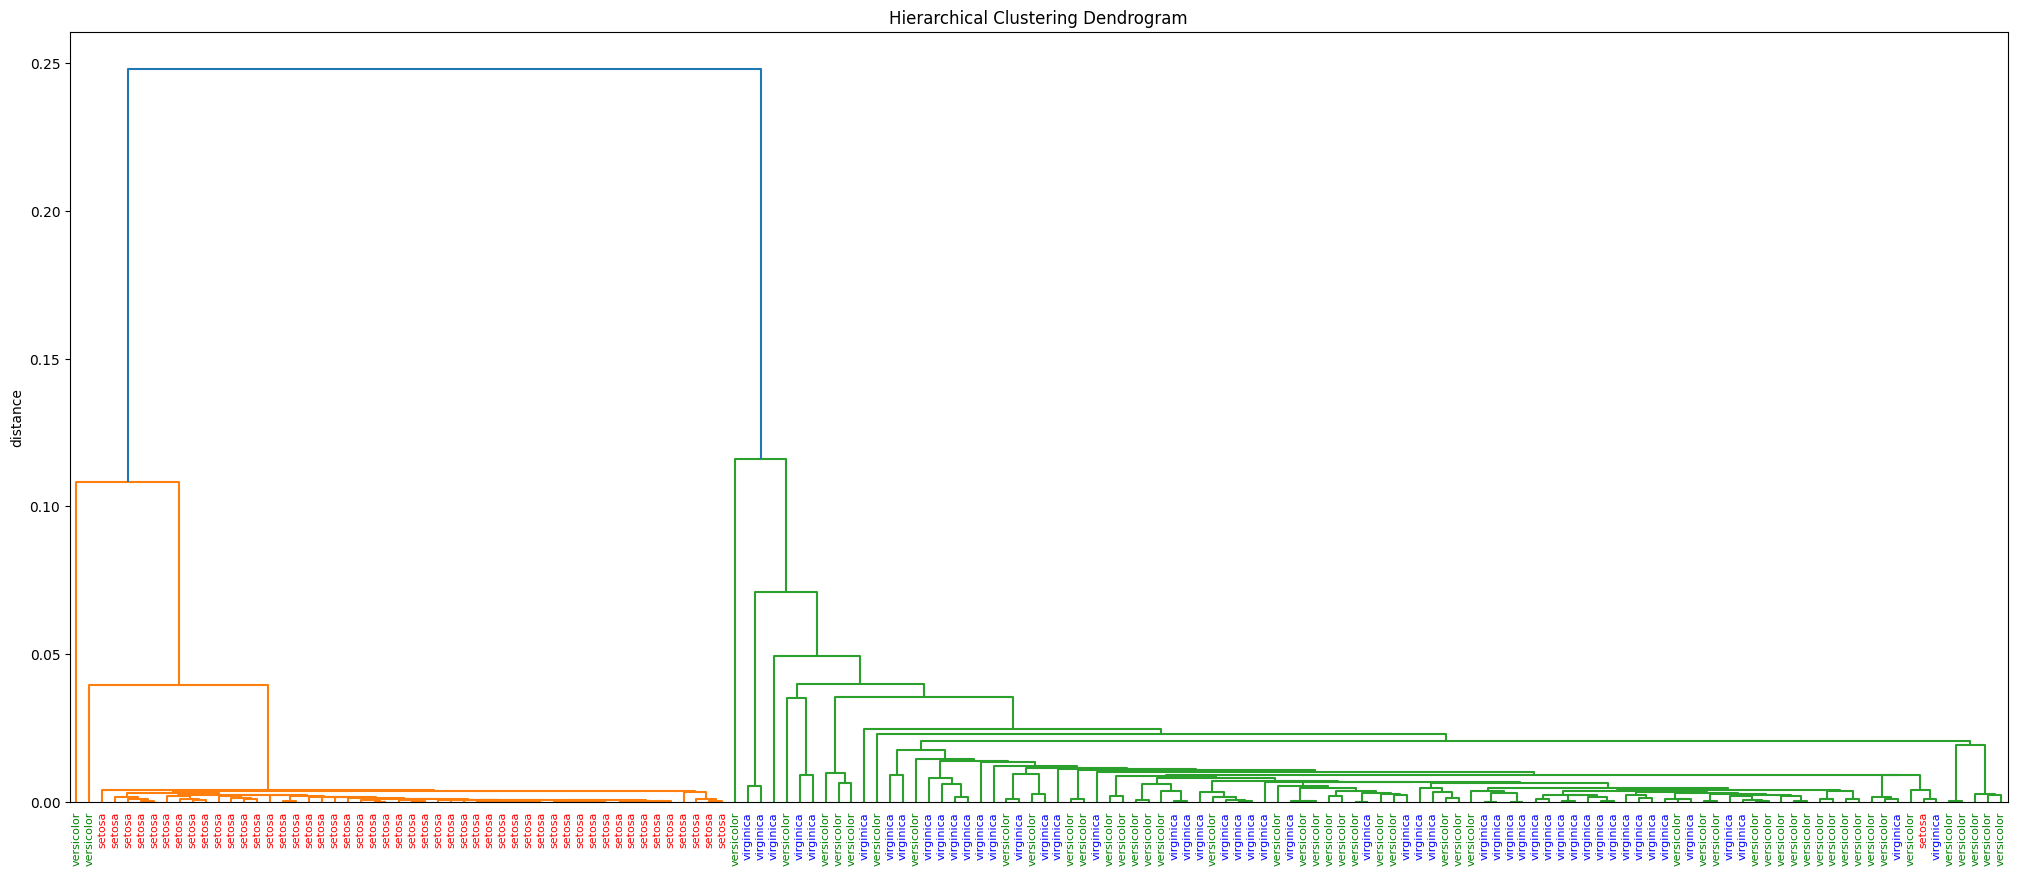

In [6]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage

iris = pd.read_csv("iris.csv", sep=",", index_col=0)
iris_scale = preprocessing.scale(iris.iloc[:,:4])

Z = linkage(iris_scale, method='single', metric='correlation')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(iris.iloc[:,4]),
    leaf_rotation=90.,  # rotates the x-axis labels
    leaf_font_size=8.,  # font size for the x-axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')


# Assignment of colors to labels: 'a' is red, 'b' is green, etc.
label_colors = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}
ax = plt.gca()
x_labels = ax.get_xmajorticklabels()
for lbl in x_labels:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

### K-Means

In [7]:
# Dado que o K-means tem uma distribuição aleatória, os resultados podem ser diferentes

In [8]:
from sklearn.cluster import KMeans
import numpy as np

k=3
kmeans_iris = KMeans(n_clusters=k, max_iter=1000)
kmeans_iris.fit(iris_scale)
labels = kmeans_iris.labels_
centroids = kmeans_iris.cluster_centers_

pd.crosstab(labels,iris["Species"], rownames=['clusters'] )

Species,setosa,versicolor,virginica
clusters,,,
0,0,39,17
1,50,0,0
2,0,11,33


In [4]:
# tabela de contingência ... manualmente :)
colNames = iris["Species"].unique()
table = pd.DataFrame(0,index = range(k), columns=colNames)
for specie in colNames:
    table[specie] = [sum(iris[labels==i]["Species"]==specie)  for i in 
                     range(k)]

table


,setosa,versicolor,virginica
0,0,38,14
1,50,0,0
2,0,12,36


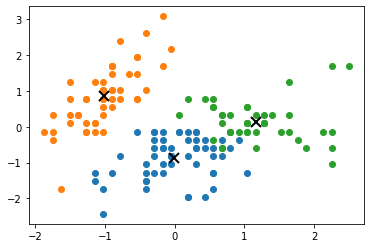

In [4]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = iris_scale[np.where(labels==i)]
    # plot the data observations (only 2 first colums)
    plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=10.0)    # x size 
    plt.setp(lines,mew=2.0)    #grossura da linha
plt.show()

### PCA

[0.72962445 0.22850762]


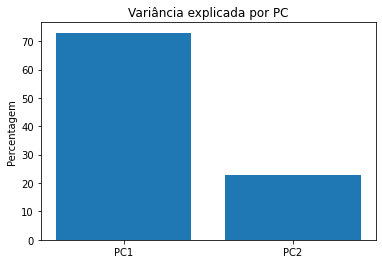

In [5]:
from sklearn.decomposition import PCA
n=2
pca_iris = PCA(n_components=n)
pca_iris.fit(iris_scale)
x_reduced = pca_iris.transform(iris_scale)

print(pca_iris.explained_variance_ratio_)  
plt.bar(range(n), pca_iris.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.show()

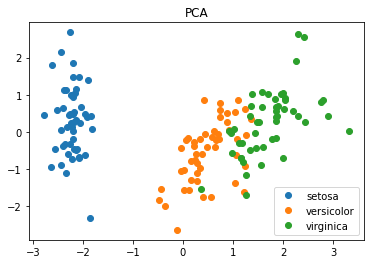

In [6]:
for specie in iris['Species'].unique():
    sp = iris.index[iris['Species']==specie]-1
    plt.plot(x_reduced[sp,0],x_reduced[sp,1], 'o' , label=specie)
plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()

In [7]:
loadings = pd.DataFrame(pca_iris.components_.T, columns=['PC1', 'PC2'], index=iris.columns[:4])
loadings

,PC1,PC2
Sepal.Length,0.521066,0.377418
Sepal.Width,-0.269347,0.923296
Petal.Length,0.580413,0.024492
Petal.Width,0.564857,0.066942


### t-SNE

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=1000)
points = tsne.fit_transform(iris_scale)

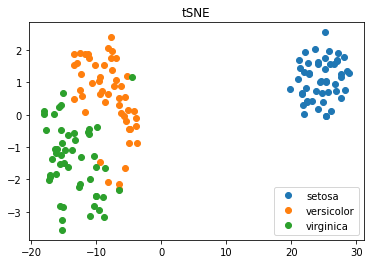

In [9]:
for specie in iris['Species'].unique():
    sp = iris.index[iris['Species']==specie]-1
    plt.plot(points[sp,0], points[sp,1], 'o' , label=specie)
plt.title("tSNE")
plt.legend(loc='best', shadow=False)
plt.show()